## ***TUGAS BESAR PENAMBANGAN DATA KELOMPOK 7***
### **Analisis Penerapan Data Mining untuk Prediksi Risiko Stroke Menggunakan K-Means Clustering dan Logistic Regression**

---

#### ***NAMA ANGGOTA KELOMPOK -- NIM***

**Arjuna Dwi Putra Kunaefi -- 102022300152**

**Raihan Tri Darma -- 102022300242**

**Rara Lianisyah -- 102022300216**

**Valerina Sherin Saprita -- 102022330089**

---

### 📄 Informasi Dataset

Sebuah tim tugas besar kelompok 7 sedang mengembangkan sistem prediksi risiko stroke berdasarkan karakteristik demografis dan kondisi kesehatan pasien. Tujuannya adalah membantu tenaga medis mengenali individu dengan potensi stroke lebih awal, sehingga intervensi medis bisa diberikan secara preventif.

Dataset yang digunakan berisi informasi berikut:

- **id** : ID unik pasien
- **gender** : Jenis kelamin pasien
- **age** : Usia pasien
- **hypertension** : Riwayat hipertensi (0 = Tidak, 1 = Ya)
- **heart_disease** : Riwayat penyakit jantung (0 = Tidak, 1 = Ya)
- **ever_married** : Status pernah menikah (Yes/No)
- **work_type : Jenis** pekerjaan pasien (Private, Self-employed, Govt_job, dll)
- **Residence_type** : Jenis tempat tinggal (Urban atau Rural)
- **avg_glucose_level** : Rata-rata kadar glukosa dalam darah
- **bmi** : Indeks massa tubuh pasien
- **smoking_status** : Riwayat merokok (formerly smoked, never smoked, smokes, unknown)
- **stroke** : Target prediksi, apakah pasien pernah mengalami stroke (1 = Ya, 0 = Tidak)


Tim memutuskan untuk menggunakan algoritma klasifikasi Naive Bayes untuk membangun model prediksi risiko stroke yang ringan namun efektif, terutama untuk implementasi awal di sistem layanan kesehatan berbasis aplikasi.

Setelah model selesai dibuat dan dievaluasi, tim juga membangun dashboard interaktif menggunakan Streamlit, dengan fitur:

* Input data pasien secara manual untuk memprediksi risiko stroke
* Visualisasi sebaran data dan performa model secara interaktif
* Evaluasi akurasi, presisi, recall, dan AUC ROC score dari model

---

# **Data Understanding**

### **Import Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

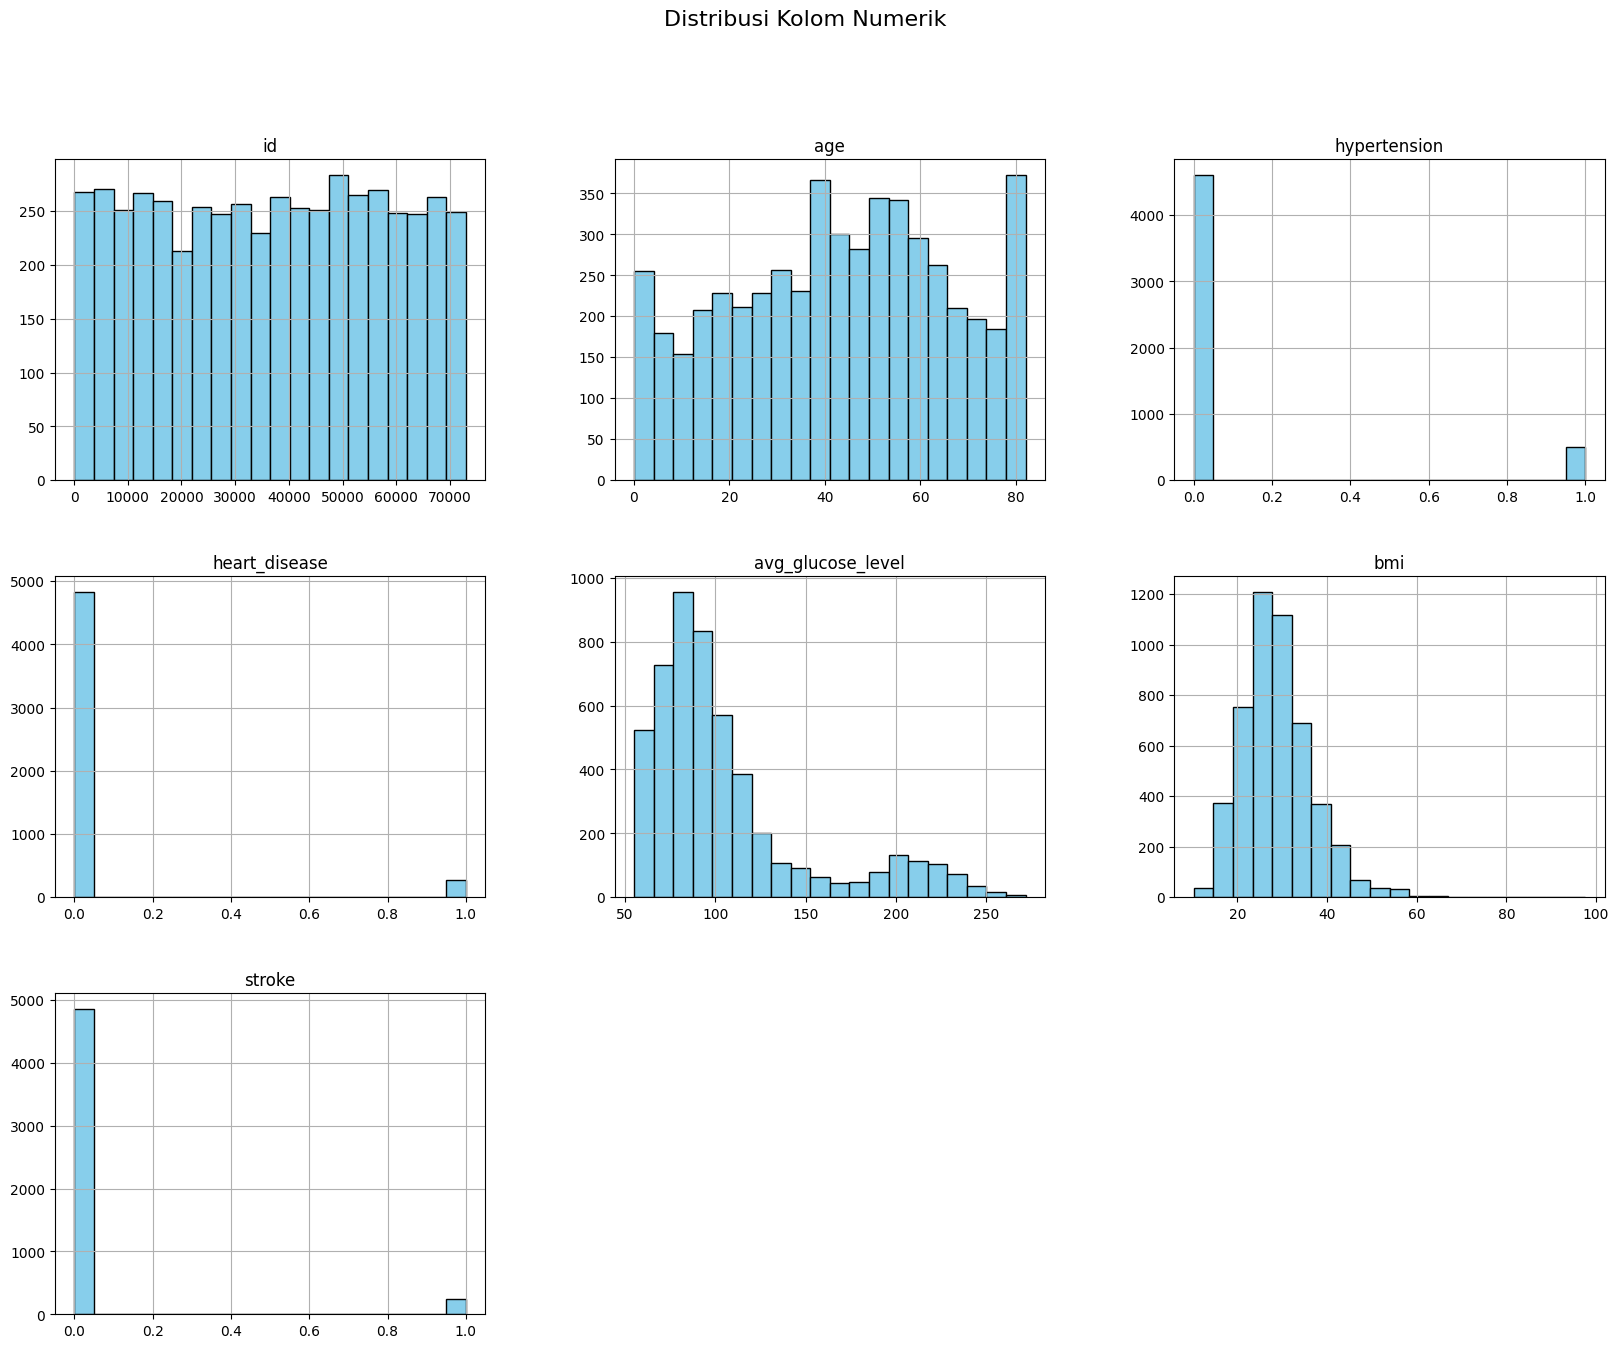

In [8]:
df.select_dtypes(include='number').hist(figsize=(20, 15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.show()

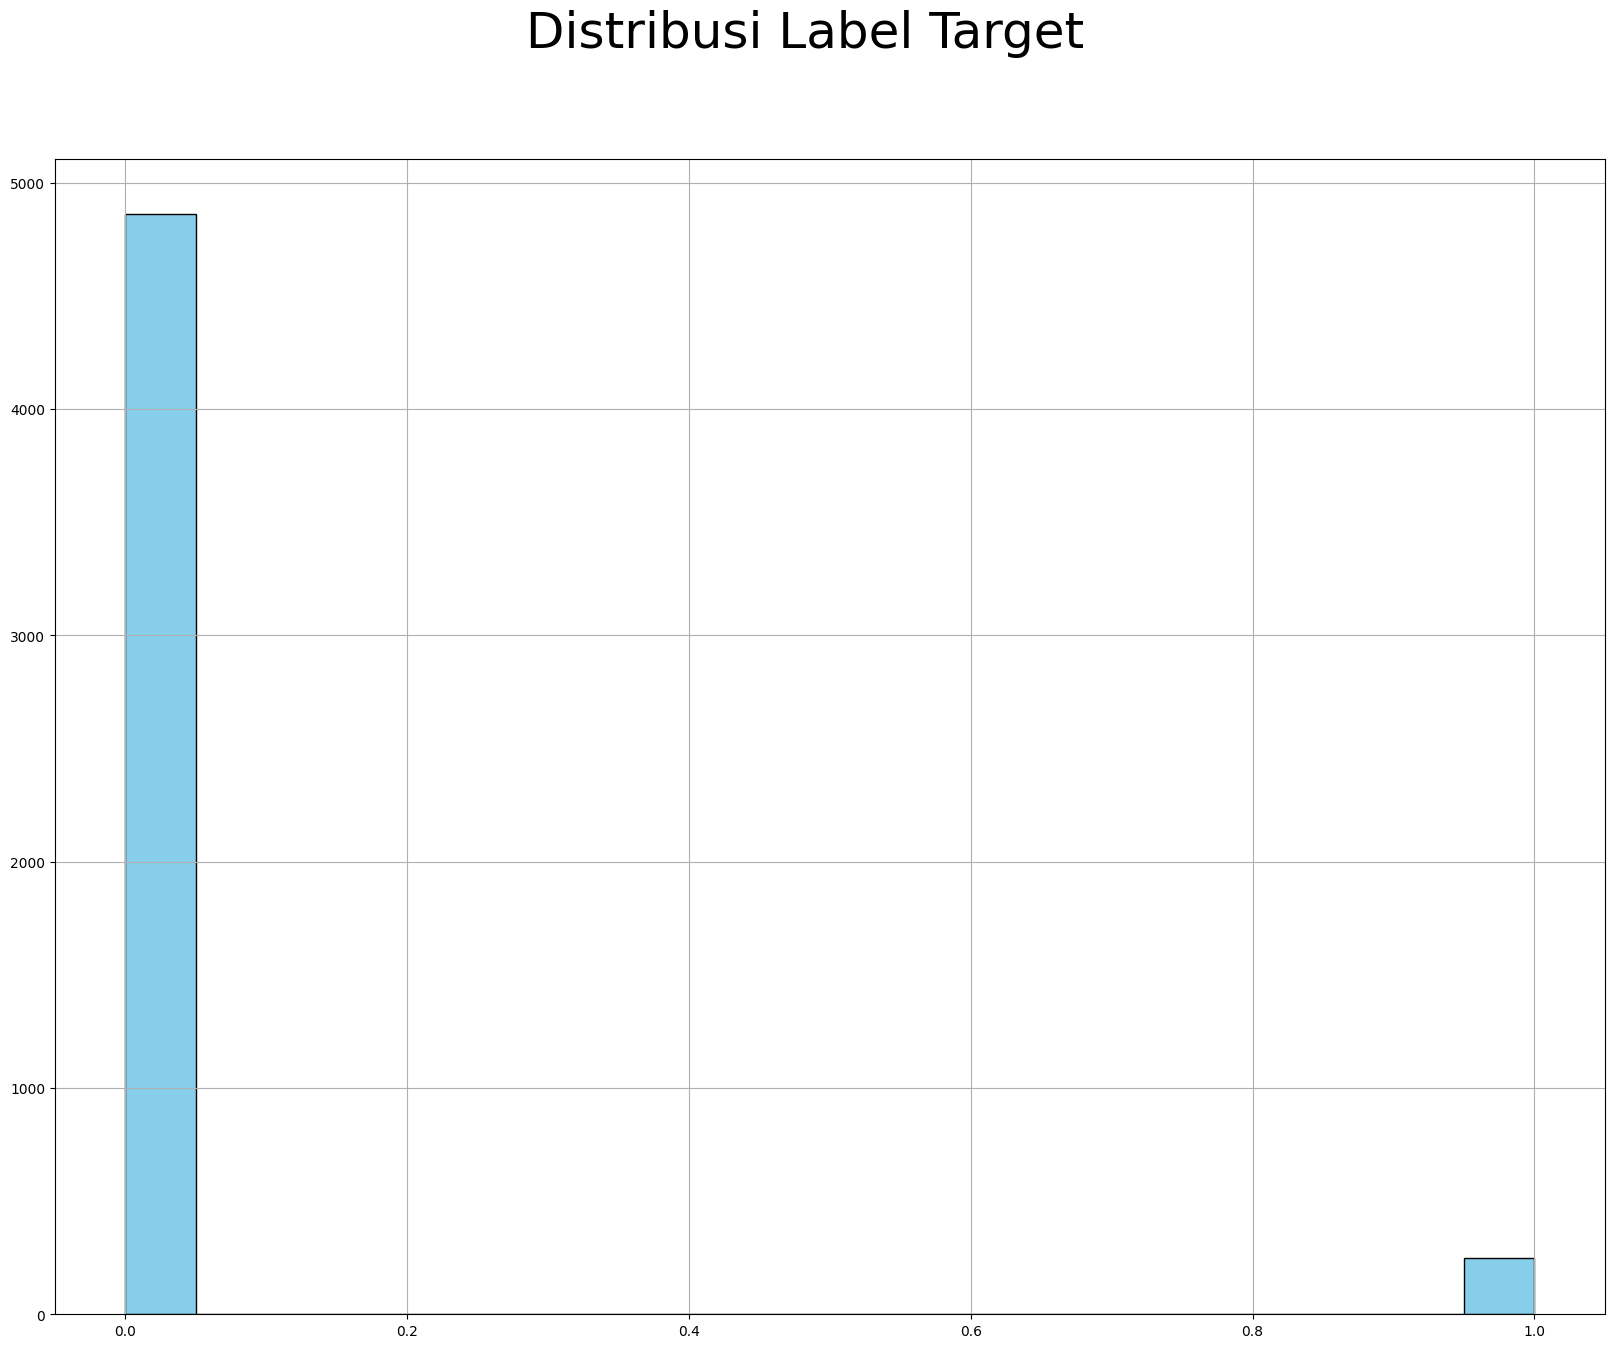

In [9]:
df['stroke'].hist(figsize=(20, 15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Label Target', fontsize=36)
plt.show()

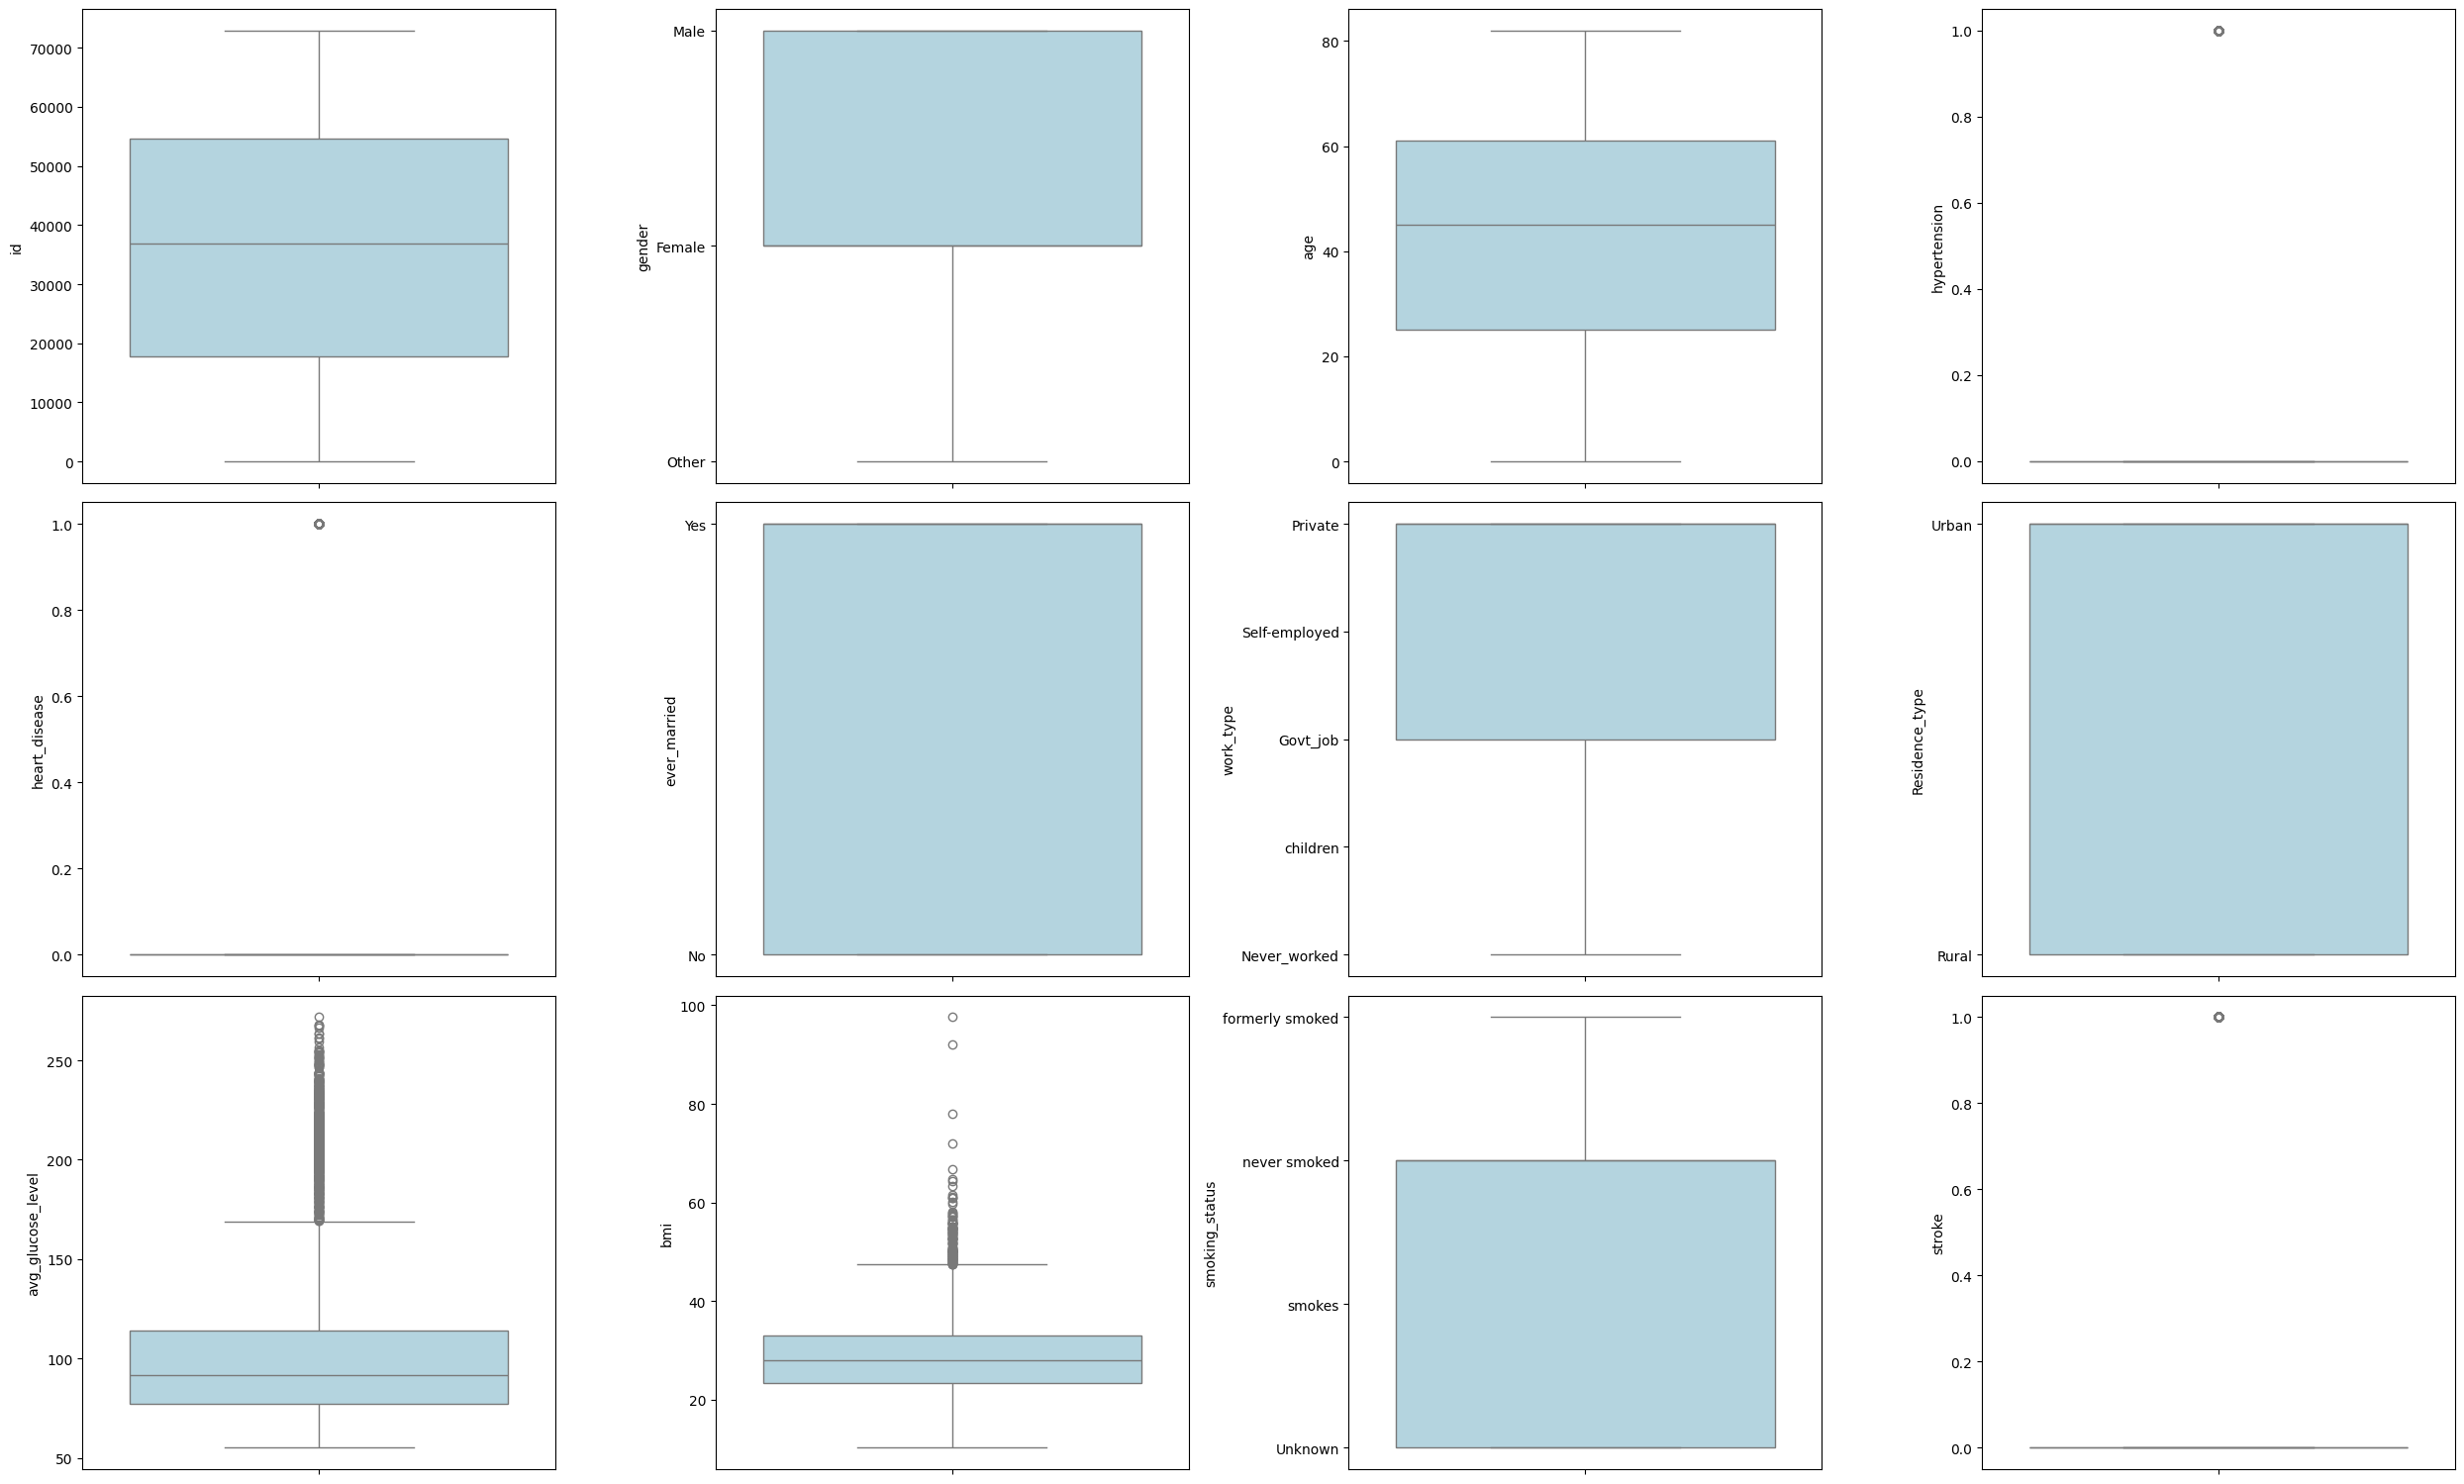

In [10]:
plt.figure(figsize=(25,30))
for i, column in enumerate(df):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df[column], color="lightblue")
plt.tight_layout()
plt.show()

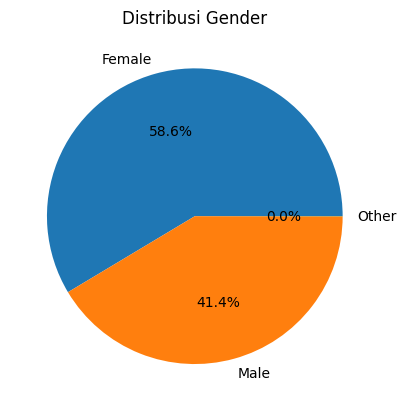

In [11]:
plt.pie(df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%1.1f%%')
plt.title("Distribusi Gender")
plt.show()

In [12]:
sex_sum = df['gender'].value_counts()
print("Distribusi gender:")
print(sex_sum)

Distribusi gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


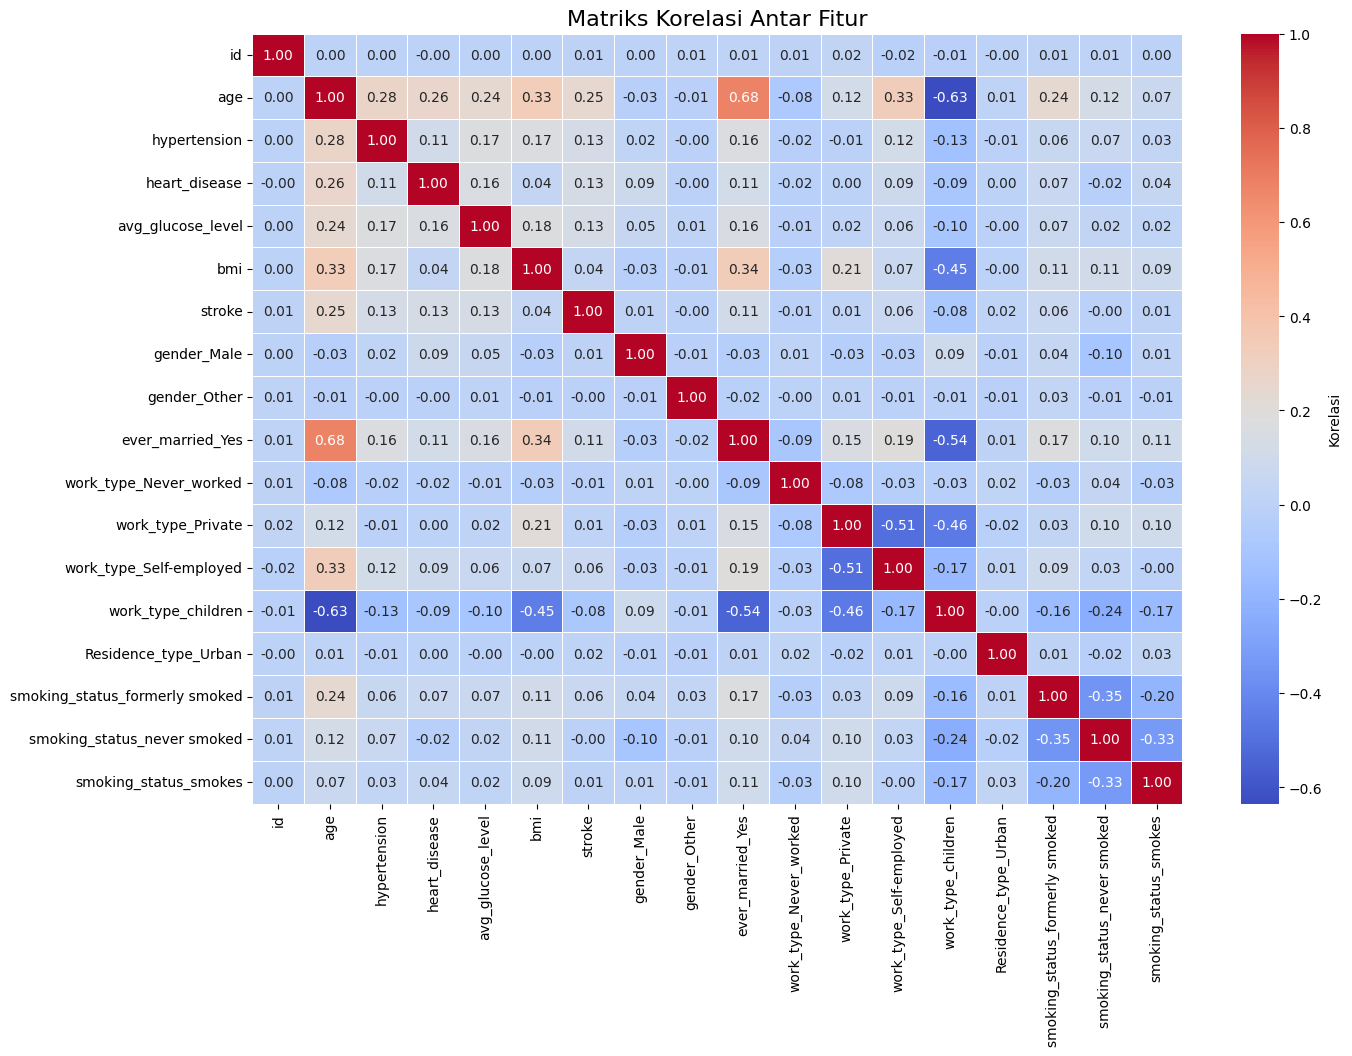

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))  
sns.heatmap(
    correlation_matrix,
    annot=True,                 
    fmt=".2f",                  
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Korelasi'}
)

plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
plt.show()

### **Drop Duplicated Data**


In [14]:
df_cleaned = df.drop_duplicates()

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### **Drop Outlier**

In [16]:
df_numeric = df_cleaned.select_dtypes(include=['number'])
q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3-q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_outliers = df_cleaned[~((df_numeric < lower) | (df_numeric > upper)).any(axis=1)]

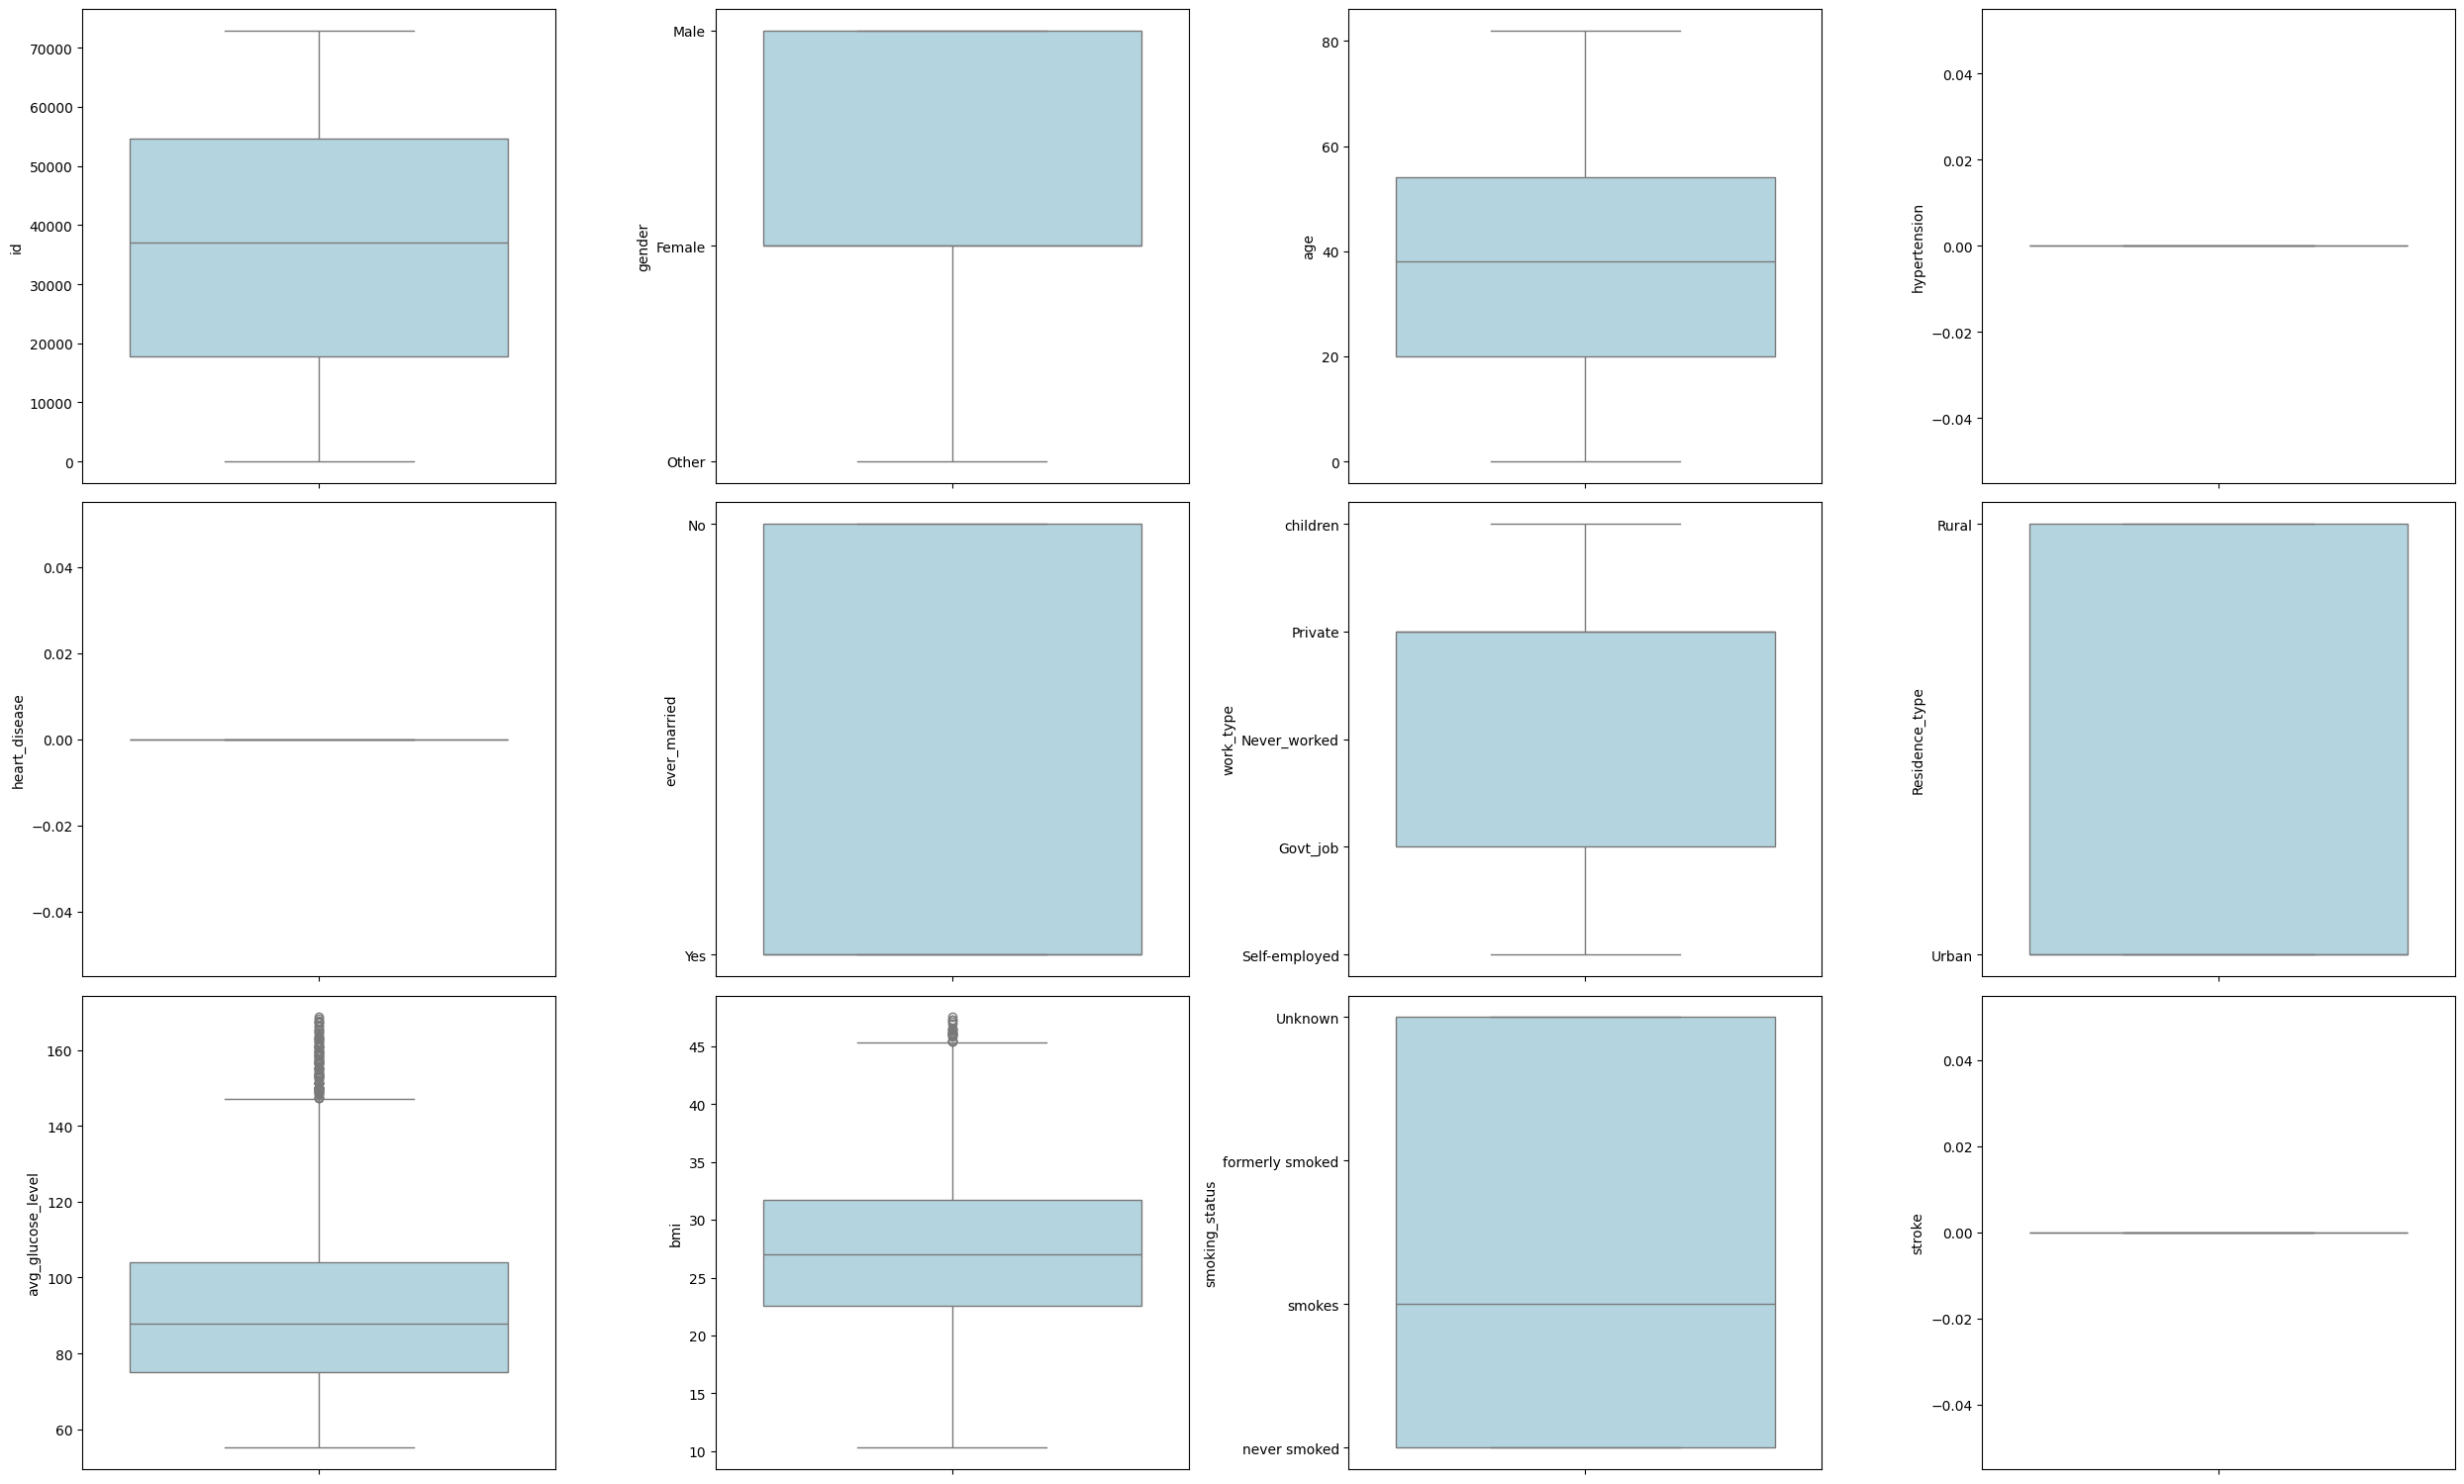

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(25,30))
for i, column in enumerate(df_outliers):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df_outliers[column], color="lightblue")
plt.tight_layout()
plt.show()

In [18]:
df_numeric2 = df_outliers.select_dtypes(include=['number'])
q1 = df_numeric2.quantile(0.25)
q3 = df_numeric2.quantile(0.75)
iqr = q3-q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_outliers2 = df_outliers[~((df_numeric2 < lower) | (df_numeric2 > upper)).any(axis=1)]

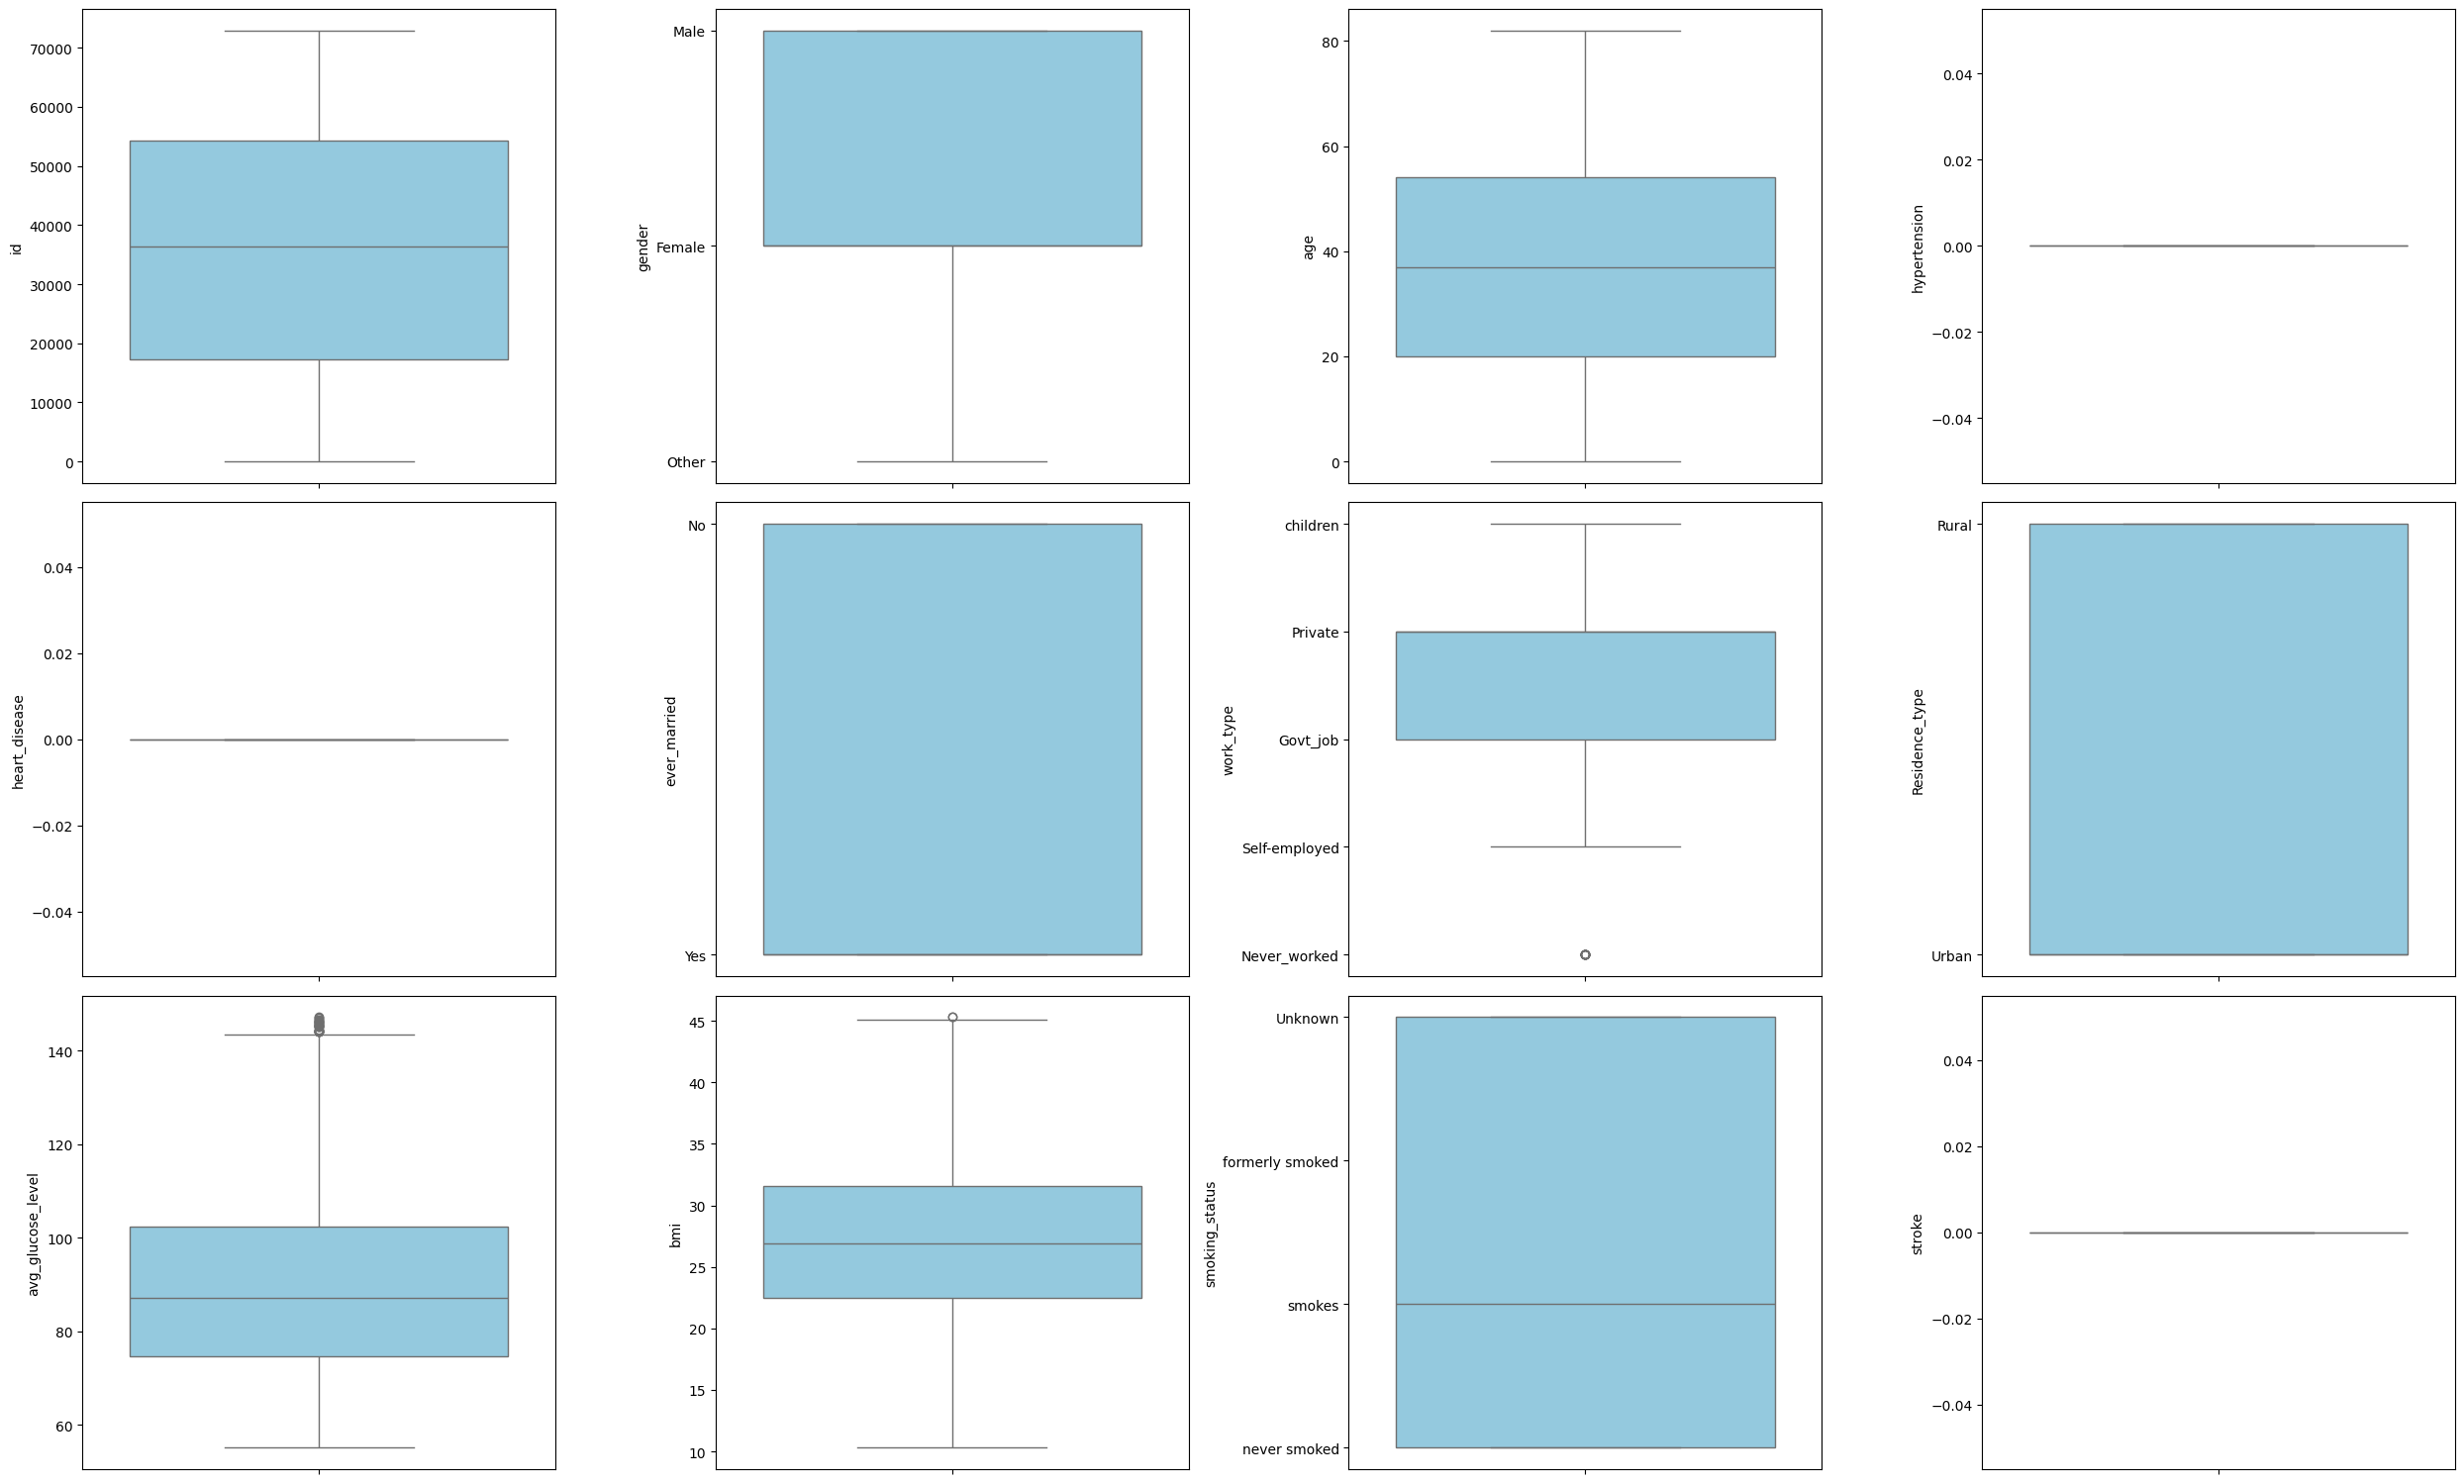

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(25,30))
for i, column in enumerate(df_outliers2):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df_outliers2[column], color="skyblue")
plt.tight_layout()
plt.show()

# **Data Preparation**

In [20]:
df.drop(['id'], axis=1, inplace=True)

In [21]:
print("Gender:", df['gender'].unique())
print("Residence_type:", df['Residence_type'].unique())

Gender: ['Male' 'Female' 'Other']
Residence_type: ['Urban' 'Rural']


In [22]:
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
residence_mapping = {'Urban': 1, 'Rural': 0}

df['gender'] = df['gender'].map(gender_mapping)
df['Residence_type'] = df['Residence_type'].map(residence_mapping)

### **Data Balancing**


In [23]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

### **Random OverSampling**

In [24]:
from sklearn.utils import resample

df_majority = df[df['stroke'] == 0]
df_minority = df[df['stroke'] == 1]

In [25]:
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

In [26]:
df = pd.concat([df_majority, df_minority_upsampled])

In [27]:
df['stroke'].value_counts()

stroke
0    4861
1    4861
Name: count, dtype: int64

# **Modeling**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [29]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [30]:
df = df.drop(columns=['id'], errors='ignore')

In [31]:
df = df.dropna(subset=['bmi', 'smoking_status', 'avg_glucose_level'])

In [32]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [33]:
df = pd.get_dummies(df, drop_first=True)

In [34]:
X = df.drop(columns='stroke')
y = df['stroke']

In [35]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = model.predict(X_test)

# **Evaluation**

In [39]:
print("Akurasi model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi model: 0.560081466395112
Confusion Matrix:
 [[500 429]
 [  3  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70       929
           1       0.10      0.94      0.19        53

    accuracy                           0.56       982
   macro avg       0.55      0.74      0.44       982
weighted avg       0.95      0.56      0.67       982



In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

Akurasi model: 0.560081466395112


In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[500 429]
 [  3  50]]


In [42]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       929
           1       0.10      0.94      0.19        53

    accuracy                           0.56       982
   macro avg       0.55      0.74      0.44       982
weighted avg       0.95      0.56      0.67       982



In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
y_prob = model.predict_proba(X_test)[:, 1]
print("Contoh probabilitas prediksi:\n", y_prob[:10])

Contoh probabilitas prediksi:
 [9.99992519e-01 7.65329626e-03 9.98146974e-01 5.64772134e-02
 5.34354485e-01 1.25103296e-01 3.64062923e-05 8.37060494e-01
 8.18940380e-01 2.37115149e-01]


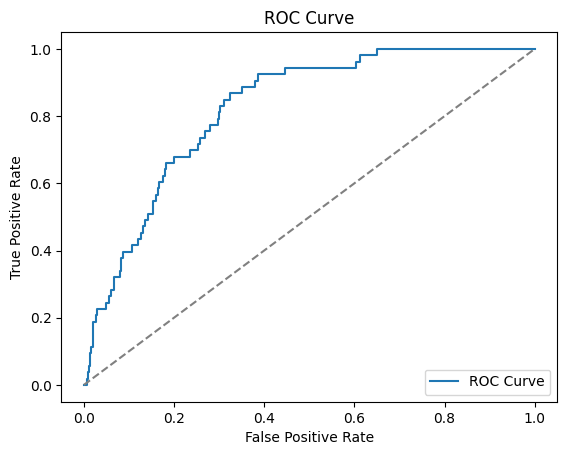

Thresholds: [           inf 9.99999998e-01 9.99999910e-01 9.99999873e-01
 9.99999764e-01 9.99999744e-01 9.99999709e-01 9.99999704e-01
 9.99999596e-01 9.99999189e-01 9.99998767e-01 9.99998720e-01
 9.99998487e-01 9.99997593e-01 9.99997066e-01 9.99995578e-01
 9.99992844e-01 9.99992832e-01 9.99989359e-01 9.99989274e-01
 9.99887161e-01 9.99886552e-01 9.99739060e-01 9.99732813e-01
 9.99630523e-01 9.99624198e-01 9.99345736e-01 9.99212265e-01
 9.99204341e-01 9.99194097e-01 9.98876685e-01 9.98858674e-01
 9.98424082e-01 9.98344824e-01 9.98102014e-01 9.98096725e-01
 9.96232218e-01 9.95376537e-01 9.92814988e-01 9.92782901e-01
 9.92080723e-01 9.91697887e-01 9.90868575e-01 9.90710551e-01
 9.89022783e-01 9.88984182e-01 9.87639952e-01 9.87508034e-01
 9.83906012e-01 9.83681637e-01 9.81042137e-01 9.81020189e-01
 9.77377142e-01 9.76982690e-01 9.76823804e-01 9.75790978e-01
 9.72205481e-01 9.72200327e-01 9.70168959e-01 9.68169898e-01
 9.67339322e-01 9.65983516e-01 9.58250388e-01 9.57514941e-01
 9.34005969e

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print("Thresholds:", thresholds)

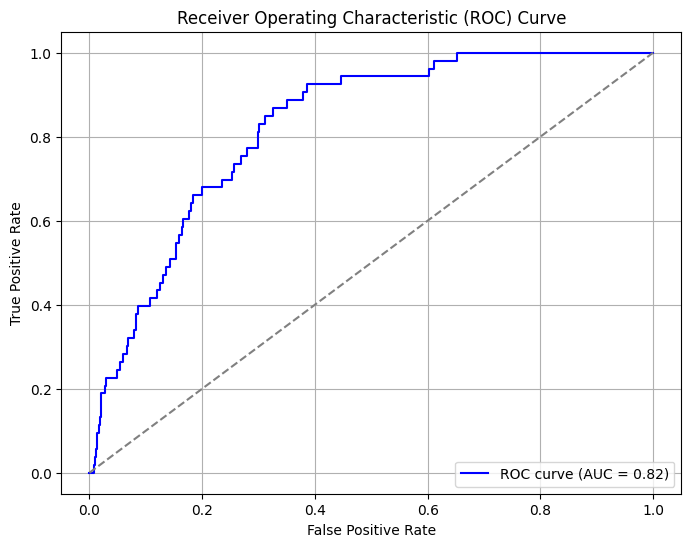

AUC: 0.8227755549688243


In [46]:
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC:", roc_auc)

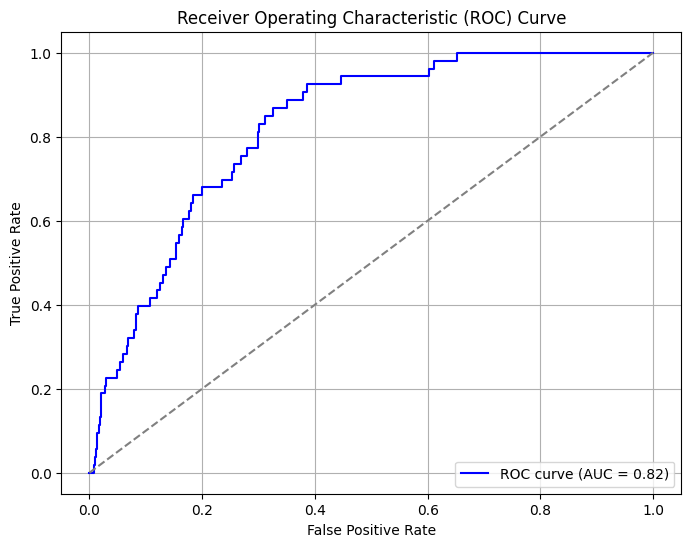

AUC: 0.8227755549688243


In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC:", roc_auc)

#### **Model Tuning**

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict
model = GaussianNB()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC Score per Fold:", cv_scores)
print("Rata-rata ROC AUC:", cv_scores.mean())

ROC AUC Score per Fold: [0.83009119 0.81053698 0.81927558 0.83548632 0.78554748]
Rata-rata ROC AUC: 0.8161875108112783


#### Latih model


In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

model = GaussianNB()

scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC Scores per Fold:", scores)
print("Average ROC AUC Score:", np.mean(scores))

ROC AUC Scores per Fold: [0.83009119 0.81053698 0.81927558 0.83548632 0.78554748]
Average ROC AUC Score: 0.8161875108112783


In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

model = GaussianNB()
y_pred = cross_val_predict(model, X, y, cv=5)
accuracy = accuracy_score(y, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.5163984518231819


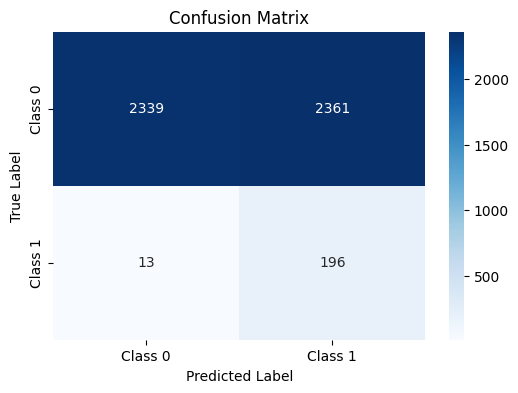

Confusion Matrix:
 [[2339 2361]
 [  13  196]]


In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix:\n", cm)

In [52]:
from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.50      0.66      4700
           1       0.08      0.94      0.14       209

    accuracy                           0.52      4909
   macro avg       0.54      0.72      0.40      4909
weighted avg       0.96      0.52      0.64      4909



In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = GaussianNB()
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC Scores per Fold:", scores)
print("Average ROC AUC Score:", np.mean(scores))

ROC AUC Scores per Fold: [0.83009119 0.81053698 0.81927558 0.83548632 0.78554748]
Average ROC AUC Score: 0.8161875108112783


### **Deployment**


In [54]:
import joblib

joblib.dump(model, "naive_bayes_stroke_model.pkl")

joblib.dump(X.columns.tolist(), "model_features.pkl")

print("✅ Model dan fitur berhasil disimpan.")

✅ Model dan fitur berhasil disimpan.


In [55]:
from sklearn.naive_bayes import GaussianNB
import joblib

model = GaussianNB()
model.fit(X_train, y_train)

joblib.dump(model, "naive_bayes_stroke_model.pkl")
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

print("Model dan fitur berhasil disimpan ulang.")

Model dan fitur berhasil disimpan ulang.


In [56]:
!ngrok config add-authtoken 2wrHJPXV8EUUwSFOEtmT5zTf4pk_4Kqf7hrqQAfdyUbbQNBEV

Authtoken saved to configuration file: C:\Users\Raihan Tri Darma\AppData\Local/ngrok/ngrok.yml


In [57]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

st.set_page_config(
    page_title="Dashboard Prediksi Stroke",
    page_icon="🧠"
)

st.title("Stroke Risk Prediction App")
st.write("Masukkan data pasien untuk memprediksi kemungkinan stroke berdasarkan model Naive Bayes.")
st.markdown("---")
st.subheader("Evaluasi Model")

model = joblib.load("naive_bayes_stroke_model.pkl")
features = joblib.load("model_features.pkl")
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

data.drop(columns=["id"], inplace=True)
data.dropna(inplace=True)
data["gender"] = data["gender"].map({"Male": 0, "Female": 1, "Other": 2})
data["Residence_type"] = data["Residence_type"].map({"Urban": 1, "Rural": 0})
data = pd.get_dummies(data, drop_first=True)

for col in features:
    if col not in data.columns:
        data[col] = 0

X = data[features]
y = data["stroke"]
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

col1, col2, col3, col4 = st.columns(4)
with col1: st.metric("Accuracy", f"{acc:.2f}")
with col2: st.metric("Precision", f"{prec:.2f}")
with col3: st.metric("Recall", f"{rec:.2f}")
with col4: st.metric("ROC AUC", f"{roc_auc:.2f}")

plot_option = st.selectbox("Pilih grafik untuk ditampilkan:", ["Pilih", "ROC AUC Curve", "Confusion Matrix"])
if plot_option == "ROC AUC Curve":
    fpr, tpr, _ = roc_curve(y, y_prob)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()
    st.pyplot(fig)
elif plot_option == "Confusion Matrix":
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    st.pyplot(fig)

st.markdown("---")
st.subheader("Prediksi Risiko Stroke")

with st.form("stroke_prediction_form"):
    gender = st.selectbox("Jenis Kelamin", options=["Male", "Female", "Other"])
    age = st.number_input("Umur", min_value=0, max_value=120, value=45)
    hypertension = st.selectbox("Hipertensi", options=["Tidak", "Ya"])
    heart_disease = st.selectbox("Penyakit Jantung", options=["Tidak", "Ya"])
    ever_married = st.selectbox("Pernah Menikah?", options=["No", "Yes"])
    work_type = st.selectbox("Jenis Pekerjaan", options=["Private", "Self-employed", "Govt_job", "children", "Never_worked"])
    residence_type = st.selectbox("Tipe Tempat Tinggal", options=["Urban", "Rural"])
    avg_glucose = st.number_input("Rata-rata Glukosa", min_value=0.0, max_value=300.0, value=100.0)
    bmi = st.number_input("BMI", min_value=10.0, max_value=100.0, value=25.0)
    smoking_status = st.selectbox("Status Merokok", options=["never smoked", "formerly smoked", "smokes", "Unknown"])
    submit = st.form_submit_button("Prediksi Risiko")

def map_inputs():
    gender_map = {"Male": 0, "Female": 1, "Other": 2}
    married_map = {"Yes": 1, "No": 0}
    residence_map = {"Urban": 1, "Rural": 0}
    base = dict.fromkeys(features, 0)
    base.update({
        "age": age,
        "hypertension": 1 if hypertension == "Ya" else 0,
        "heart_disease": 1 if heart_disease == "Ya" else 0,
        "avg_glucose_level": avg_glucose,
        "bmi": bmi,
        "gender": gender_map[gender],
        "ever_married_Yes": 1 if ever_married == "Yes" else 0,
        f"work_type_{work_type}": 1,
        "Residence_type": residence_map[residence_type],
        f"smoking_status_{smoking_status}": 1
    })
    return pd.DataFrame([base])

if submit:
    try:
        input_df = map_inputs()
        pred = model.predict(input_df)[0]
        prob = model.predict_proba(input_df)[0][1]
        st.subheader("Hasil Prediksi")
        if pred == 1:
            st.error(f"Pasien diprediksi BERISIKO STROKE ⚠️\n\nProbabilitas: **{prob:.2f}**")
        else:
            st.success(f"Pasien diprediksi TIDAK berisiko stroke ✅\n\nProbabilitas: **{prob:.2f}**")
    except Exception as e:
        st.error(f"Terjadi error saat prediksi: {e}")

2025-06-13 21:30:43.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:30:43.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:30:44.086 
  command:

    streamlit run C:\Users\Raihan Tri Darma\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-13 21:30:44.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:30:44.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:30:44.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:30:44.092 Thread 'MainThread': missing ScriptRunContext! This wa

In [58]:
from pyngrok import ngrok
import threading
import time
import os

In [ ]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://e39a-114-10-149-206.ngrok-free.app" -> "http://localhost:8501"


t=2025-06-13T21:34:00+0700 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=30ebce37e9a5 err="read tcp 172.20.10.6:59473->3.20.27.198:443: wsarecv: An established connection was aborted by the software in your host machine."
t=2025-06-13T21:34:13+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to send authentication request: failed to fetch CRL. errors encountered: timed out fetching CRL"
t=2025-06-13T21:34:15+0700 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=bf909ff92164 clientid=bfd3ba1509c433af02b82bb31050a0ff
t=2025-06-13T21:34:23+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: i/o timeout"
